# Climatologie et au lit
### *Orkaëlle*

## Initialisation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utiles
import fct_climatologie as fct

Loading raw datas

In [3]:
utiles.loading_raw()

Datas already downloaded.
Datas are successfully loaded.



Création du dataframe

In [94]:
df = fct.creation_df()
df.head(10)

Import des données 1995 -> 2019...
OK.

Gestion des doublons...
OK.

Gestion des manquants...
OK.

Finalisation...
OK.

Traitement terminé.


,Date,City,Country,Region,AvgTemperature,month,year
0,1995-01-01,Abidjan,Ivory Coast,Africa,28.111111,1,1995
1,1995-01-02,Abidjan,Ivory Coast,Africa,27.944444,1,1995
2,1995-01-03,Abidjan,Ivory Coast,Africa,27.222222,1,1995
3,1995-01-04,Abidjan,Ivory Coast,Africa,28.500000,1,1995
4,1995-01-05,Abidjan,Ivory Coast,Africa,28.555556,1,1995
5,1995-01-06,Abidjan,Ivory Coast,Africa,28.944444,1,1995
6,1995-01-07,Abidjan,Ivory Coast,Africa,28.055556,1,1995
7,1995-01-08,Abidjan,Ivory Coast,Africa,27.388889,1,1995
8,1995-01-09,Abidjan,Ivory Coast,Africa,26.500000,1,1995
9,1995-01-10,Abidjan,Ivory Coast,Africa,27.166667,1,1995


## Requêtes

### Requête 1 - Les températures moyennes françaises de 1995 à 2019

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [96]:
df_rq1 = df.loc[df['Country'] == 'France']

In [97]:
df_plot = df_rq1.groupby(['year']).mean().reset_index()
df_plot.head()

,year,AvgTemperature,month
0,1995,13.086758,6.526027
1,1996,12.285595,6.513661
2,1997,13.819254,6.526027
3,1998,11.395129,6.526027
4,1999,13.151370,6.526027


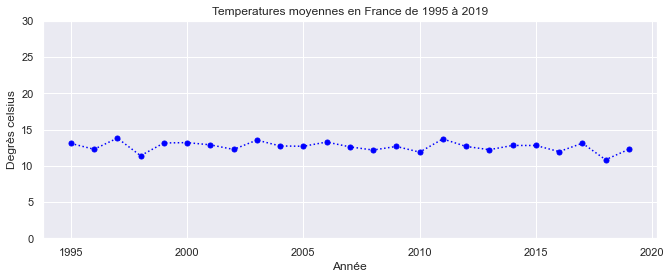

In [99]:
x = df_plot['year']
y = df_plot['AvgTemperature']

plt.plot(x, y, linestyle = ':', marker = 'o', color = 'blue', markersize = 5)
plt.title('Temperatures moyennes en France de 1995 à 2019')
plt.ylabel('Degrès celsius')
plt.xlabel('Année')

axes = plt.gca()
axes.set_ylim(0, 30)

plt.show()

### Requête 2 - L'évolution moyenne de la temperature chaque mois de l'année (sur toutes les années donc) de chaque région du globe (à l'aide de subplots, soit plusieurs diagramme sur un seul affichage) 

In [100]:
df_rq2 = df

In [113]:
df_plot = df_rq2.groupby(['Region','month']).mean().reset_index()

In [123]:
regions = df_plot['Region'].drop_duplicates().tolist()
regions


['Africa',
 'Asia',
 'Australia/South Pacific',
 'Europe',
 'Middle East',
 'North America',
 'South/Central America & Carribean']

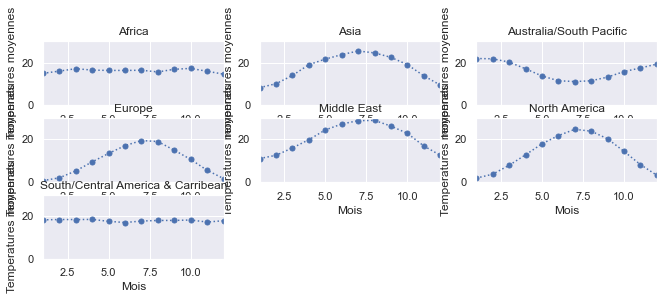

In [129]:
for r in regions :
    df_subplot = df_plot.loc[df_plot['Region'] == r]
    i = regions.index(r)+1

    x = df_subplot['month']
    y = df_subplot['AvgTemperature']

    plt.subplot(3,3,i)
    plt.plot(x, y, linestyle = ':', marker = 'o', markersize = 5)
    plt.title(r)
    plt.ylabel('Temperatures moyennes')
    plt.xlabel('Mois')

    axes = plt.gca()
    axes.set_ylim(0, 30)
    axes.set_xlim(1, 12)   

plt.show()